In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies/movies.csv


In [2]:
#import the libraries we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of plots we cretae

pd.options.mode.chained_assignment = None

**Reading the dataset**

In [3]:
# loading the dataset from the .csv file

df = pd.read_csv('../input/movies/movies.csv')
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0.0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497.0,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0.0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368.0,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000.0,Warner Bros. Animation,USA,Sam Liu,Animation,3775000.0,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016


In [4]:
# displaying top 5 rows

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


# Data Cleaning

### Checking for any missing data

In [5]:
# Check for any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


We found that there are **no missing values** in data

In [6]:
# Checking Data types of each columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

### Changing Data types 

If we check the values in column "Budget" and "Gross" we can see that it is in "float" datatypes but there is no digits after the decimals, so we change the data type from "float" to "int"

In [7]:
# changing data types of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [8]:
#creating new column with correct year

df['yearcorrect'] = df['released'].astype(str).str[:4]
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [9]:
# changing datatype of 'yearcorrect' from string to int

df['yearcorrect'] = df['yearcorrect'].astype('int64')
df.dtypes

budget           int64
company         object
country         object
director        object
genre           object
gross            int64
name            object
rating          object
released        object
runtime          int64
score          float64
star            object
votes            int64
writer          object
year             int64
yearcorrect      int64
dtype: object

### Sorting Dataset

Sorting the dataset by the values of 'gross' column and find the top 5 movies with highest gross earning

In [10]:
# sorting the dataset by 'gross' column

df.sort_values(by=['gross'], inplace= False, ascending= False)
df = df.sort_values(by=['gross'], inplace= False, ascending= False)

### Checking for Duplicates 

In [11]:
# checking for duplicates for one column

df['company'].drop_duplicates().sort_values(ascending = False)

5288                        micro_scope
3486                           i5 Films
6084                               erbp
3225                     double A Films
2707        Zucker Brothers Productions
                     ...               
3527                          120 Films
5466              10th Hole Productions
2815                 101st Street Films
3208                 1+2 Seisaku Iinkai
3832    "DIA" Productions GmbH & Co. KG
Name: company, Length: 2179, dtype: object

In [12]:
# drop duplicates

df.drop_duplicates()


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


# EDA and Finding Correlations

### Movie Budget vs Gross Earnings

<function matplotlib.pyplot.show(close=None, block=None)>

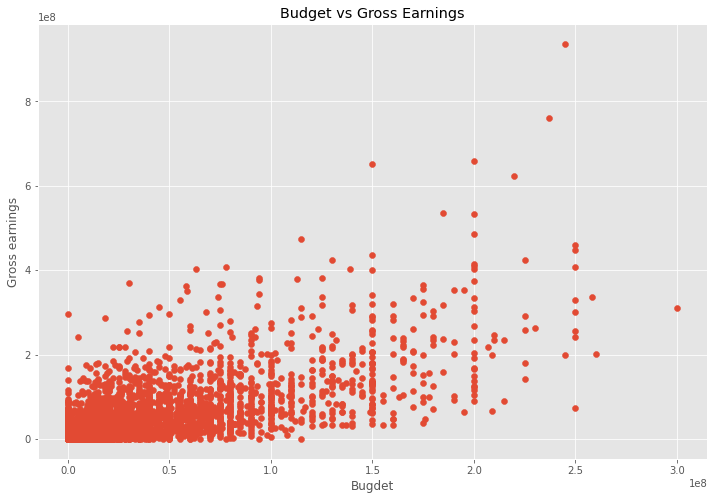

In [13]:
# scatter plot with budget vs gross

df.head()
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Bugdet')
plt.ylabel('Gross earnings')
plt.show

Text(0, 0.5, 'Gross earnings')

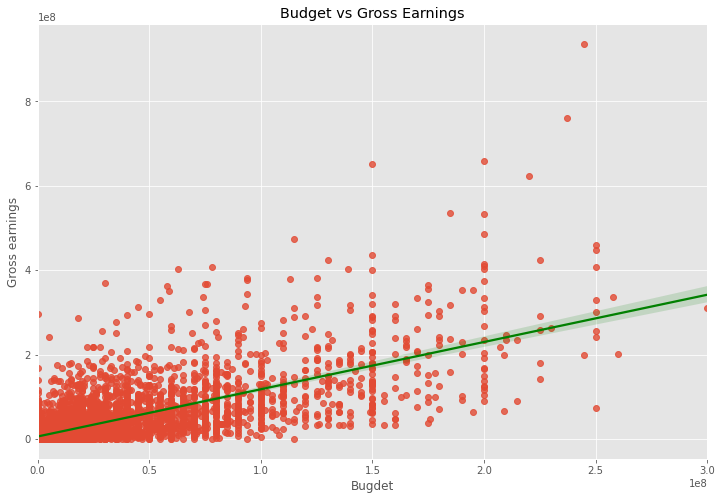

In [14]:
# Regression Plot using Seaborn with budget vs gross

sns.regplot(x='budget', y='gross', data= df, line_kws={"color":"green"})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Bugdet')
plt.ylabel('Gross earnings')

The Regression plot shows **Positive Correlation** between Budget and Gross 

### Correlation Values

In [15]:
# Finding for correlation values

df.corr() #only works on numerical fields
          #uses 'pearson' corr which is default, others are 'kendall' and 'spearman'

df.corr(method="pearson")


,budget,gross,runtime,score,votes,year,yearcorrect
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009,0.274820
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548,0.176879
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639,0.088342
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276,0.117679
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304,0.220797
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000,0.996229
yearcorrect,0.274820,0.176879,0.088342,0.117679,0.220797,0.996229,1.000000


There is **High Correlation** between 'Budget' and 'Gross'


### Visualizing Correlation

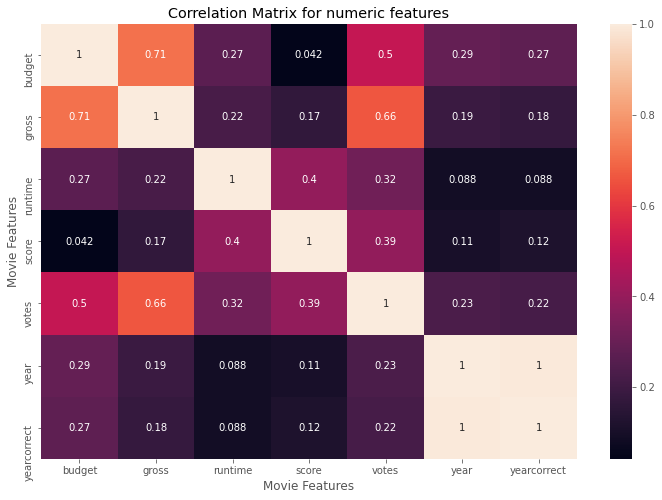

In [16]:
#Heatmap using Seaborn for numeric values

correlation_matrix = df.corr(method="pearson")

sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [17]:
#look at company, a object feild
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012


**Changing all Data fiels type** into Numeric values

In [18]:
# Changing the categorical features into categories and replacing with an integer values for distinct category

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,2015
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,2009
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,1997
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,2015
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,2012


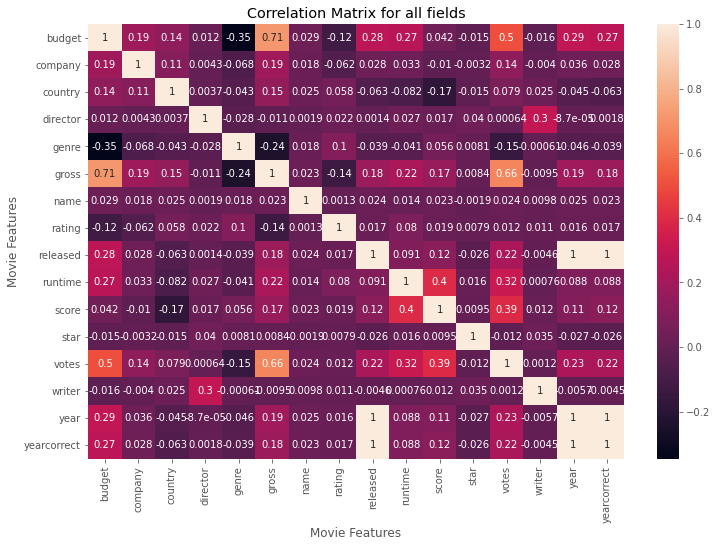

In [19]:
#heatmap using Seaborn for all fields

df_numerized = df.corr(method="pearson")

sns.heatmap(df_numerized, annot= True)
plt.title('Correlation Matrix for all fields')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

### Correlation for all fields

In [20]:
# corr for all fields

df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
budget,1.000000,0.267820,0.116606,-0.203303,-0.743538,0.921935,-0.118792,-0.430956,0.326184,0.341923,0.069466,-0.208177,0.770585,-0.246491,0.340292,0.324699
company,0.267820,1.000000,0.163990,-0.137007,-0.276254,0.270015,-0.080135,-0.281514,-0.104934,-0.060213,-0.156960,-0.121620,0.154090,-0.151889,-0.095575,-0.104845
country,0.116606,0.163990,1.000000,-0.083608,-0.169932,0.131641,-0.036141,-0.015138,-0.284103,-0.306249,-0.469746,-0.098616,-0.029529,-0.046420,-0.268846,-0.283666
director,-0.203303,-0.137007,-0.083608,1.000000,-0.061318,-0.231305,-0.108546,-0.044380,-0.217414,-0.154399,-0.148773,0.003507,-0.261147,0.494731,-0.220812,-0.216630
genre,-0.743538,-0.276254,-0.169932,-0.061318,1.000000,-0.655539,0.001621,0.237973,-0.217827,-0.249438,-0.036144,0.015068,-0.548487,-0.010561,-0.229331,-0.216878
gross,0.921935,0.270015,0.131641,-0.231305,-0.655539,1.000000,-0.127936,-0.446903,0.173324,0.346283,0.197375,-0.182057,0.877350,-0.247025,0.186651,0.171763
name,-0.118792,-0.080135,-0.036141,-0.108546,0.001621,-0.127936,1.000000,-0.085089,-0.128644,-0.141287,-0.109512,-0.091014,-0.162329,-0.091308,-0.129505,-0.128742
rating,-0.430956,-0.281514,-0.015138,-0.044380,0.237973,-0.446903,-0.085089,1.000000,-0.158253,-0.061893,-0.096334,-0.049036,-0.297085,-0.055771,-0.162990,-0.157196
released,0.326184,-0.104934,-0.284103,-0.217414,-0.217827,0.173324,-0.128644,-0.158253,1.000000,-0.002013,0.055924,-0.235766,0.209631,-0.233511,0.999767,0.999997
runtime,0.341923,-0.060213,-0.306249,-0.154399,-0.249438,0.346283,-0.141287,-0.061893,-0.002013,1.000000,0.614308,-0.134519,0.487299,-0.205894,-0.005796,-0.004120


In [21]:
# unstacking the correlation matrix to show only corr values

correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs

budget       budget         1.000000
             company        0.267820
             country        0.116606
             director      -0.203303
             genre         -0.743538
                              ...   
yearcorrect  star          -0.235693
             votes          0.208078
             writer        -0.232800
             year           0.999762
             yearcorrect    1.000000
Length: 256, dtype: float64

**Columns with highest correlations**

In [22]:
# Sort the pairs to find only pais with high correlation

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.743538
budget       genre         -0.743538
gross        genre         -0.655539
genre        gross         -0.655539
             votes         -0.548487
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [23]:
# Pairs with high correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.6]
high_corr

score        runtime        0.614308
runtime      score          0.614308
votes        budget         0.770585
budget       votes          0.770585
votes        gross          0.877350
gross        votes          0.877350
budget       gross          0.921935
gross        budget         0.921935
yearcorrect  year           0.999762
year         yearcorrect    0.999762
             released       0.999767
released     year           0.999767
             yearcorrect    0.999997
yearcorrect  released       0.999997
budget       budget         1.000000
writer       writer         1.000000
votes        votes          1.000000
star         star           1.000000
score        score          1.000000
runtime      runtime        1.000000
released     released       1.000000
rating       rating         1.000000
name         name           1.000000
gross        gross          1.000000
genre        genre          1.000000
director     director       1.000000
country      country        1.000000
c

**Budgets and Gross has the higest correlations.**.